<a href="https://colab.research.google.com/github/Faith927/Machine-Learning-A2/blob/main/A2_TrafficSigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tensorflow.__version__)

NameError: name 'tensorflow' is not defined

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls /content/drive/'My Drive'/COSC2673A2/

A2-TrafficSigns.ipynb  German-Traffic-Sign-Recognition.v5i.tfrecord.zip  trafficsigns_dataset.zip


In [4]:
!cp /content/drive/'My Drive'/COSC2673A2/trafficsigns_dataset.zip .
!unzip -q -o trafficsigns_dataset.zip
!rm trafficsigns_dataset.zip
!ls


drive  __MACOSX  sample_data  trafficsigns_dataset


#**EDA**

In [5]:
# libraries

import os
from PIL import Image

import matplotlib.pyplot as plt
import random

import matplotlib.pyplot as plt
import pandas as pd
import glob
import cv2

In [6]:
dataset_folder = 'trafficsigns_dataset'

# List subfolders in dataset folder
subfolders = [subfolder for subfolder in os.listdir(dataset_folder) if os.path.isdir(os.path.join(dataset_folder, subfolder))]

# Iterate over subfolders
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_folder, subfolder)
    print(f"Subfolder: {subfolder}")

    # List files in current subfolder
    files = os.listdir(subfolder_path)

    # Print files in current subfolder
    for file in files:
        print(f"  - {file}")


Subfolder: hex
  - stop
Subfolder: round
  - trafficdirective
  - limitedtraffic
  - noentry
  - roundabout
  - noparking
  - traveldirection
  - bicycle
  - speed
  - .DS_Store
Subfolder: triangle
  - warning
  - giveway
Subfolder: square
  - continue
  - parking
  - laneend
  - crossing
  - .DS_Store
Subfolder: diamond
  - rightofway


In [14]:
dataset_folder = 'trafficsigns_dataset'
subfolders = ['hex', 'triangle', 'diamond', 'square', 'round']

data = []
subfolder_variables = {}

# Iterate over the main subfolders
for label in subfolders:
    subfolder_path = Path(dataset_folder) / label

    # Initialize empty dictionary for sub-subfolders
    subfolder_variables[label] = {}

    # Iterate over sub-subfolders
    for sub_label in subfolder_path.iterdir():
        if sub_label.is_dir():
            images = [file for file in sub_label.iterdir() if file.suffix == '.png']
            subfolder_variables[label][sub_label.name] = images

            # Append image name (full path) and label to the data list for DataFrame creation
            data.extend({'image name': str(image), 'label': f"{label}/{sub_label.name}"} for image in images)

df = pd.DataFrame(data)
print(df.head())


                                      image name     label
0  trafficsigns_dataset/hex/stop/01920_00000.png  hex/stop
1  trafficsigns_dataset/hex/stop/00685_00001.png  hex/stop
2  trafficsigns_dataset/hex/stop/00478_00002.png  hex/stop
3  trafficsigns_dataset/hex/stop/00684_00001.png  hex/stop
4  trafficsigns_dataset/hex/stop/01258_00001.png  hex/stop


In [15]:
label_counts = df['label'].value_counts()
print(label_counts)

label
triangle/warning          695
round/noentry             375
round/speed               316
round/bicycle             285
diamond/rightofway        282
square/parking            276
round/noparking           242
triangle/giveway          231
square/continue           199
round/trafficdirective    195
round/limitedtraffic      125
round/traveldirection     124
square/laneend            118
round/roundabout           98
square/crossing            95
hex/stop                   43
Name: count, dtype: int64


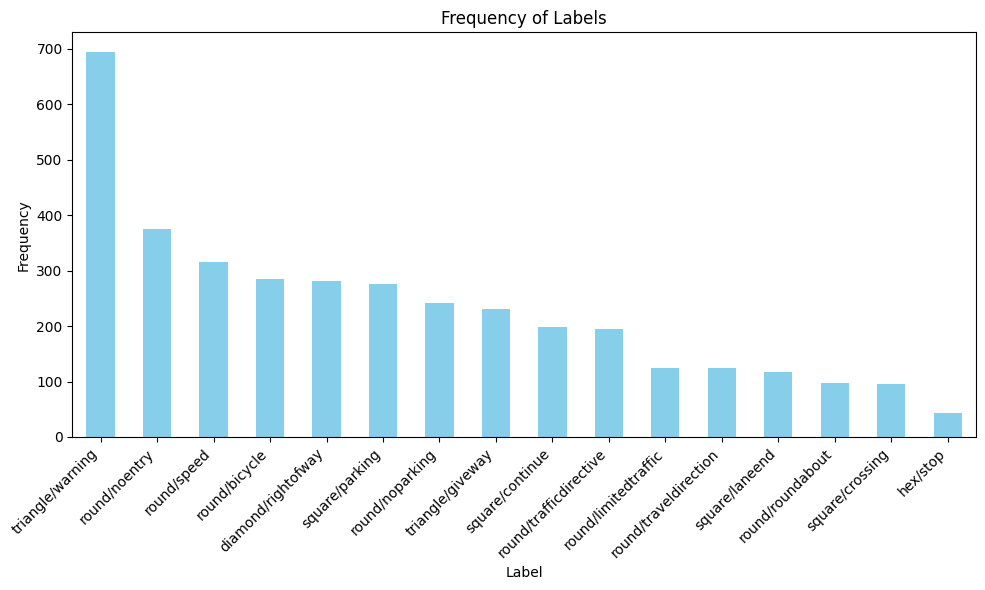

In [16]:
# Plotting length of each label with bar chart
plt.figure(figsize=(10, 6))

# Create a bar plot
label_counts.plot(kind='bar', color='skyblue')

plt.title('Frequency of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [17]:
print(subfolder_variables['hex']['stop'])

[PosixPath('trafficsigns_dataset/hex/stop/01920_00000.png'), PosixPath('trafficsigns_dataset/hex/stop/00685_00001.png'), PosixPath('trafficsigns_dataset/hex/stop/00478_00002.png'), PosixPath('trafficsigns_dataset/hex/stop/00684_00001.png'), PosixPath('trafficsigns_dataset/hex/stop/01258_00001.png'), PosixPath('trafficsigns_dataset/hex/stop/01162_00000.png'), PosixPath('trafficsigns_dataset/hex/stop/00684_00002.png'), PosixPath('trafficsigns_dataset/hex/stop/00715_00001.png'), PosixPath('trafficsigns_dataset/hex/stop/01258_00002.png'), PosixPath('trafficsigns_dataset/hex/stop/00375_00001.png'), PosixPath('trafficsigns_dataset/hex/stop/01162_00002.png'), PosixPath('trafficsigns_dataset/hex/stop/00684_00000.png'), PosixPath('trafficsigns_dataset/hex/stop/00478_00001.png'), PosixPath('trafficsigns_dataset/hex/stop/00554_00001.png'), PosixPath('trafficsigns_dataset/hex/stop/01832_00000.png'), PosixPath('trafficsigns_dataset/hex/stop/00715_00003.png'), PosixPath('trafficsigns_dataset/hex/sto

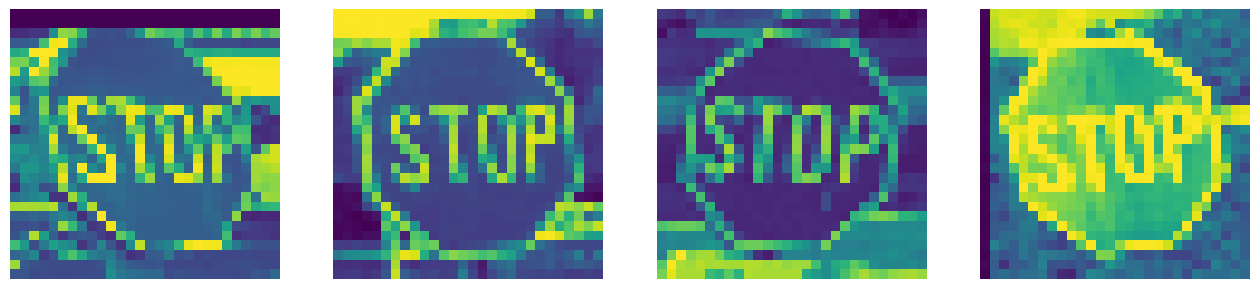

In [20]:
def random_image(pic_list, sample_size=4):
    '''Display a random sample of images from pic_list'''
    fig = plt.gcf()
    fig.set_size_inches(16, 16)  # fig size

    # Randomly select a subset of images from pic_list
    sampled_images = random.sample(pic_list, min(sample_size, len(pic_list)))

    # Load and display the sampled images
    for i, img_path in enumerate(sampled_images):
        img = Image.open(img_path)
        sp = plt.subplot(1, sample_size, i + 1)
        sp.axis('Off')
        plt.imshow(img)

    plt.show()

# show stop subfolder of hex
random_image(subfolder_variables['hex']['stop'], sample_size=4)


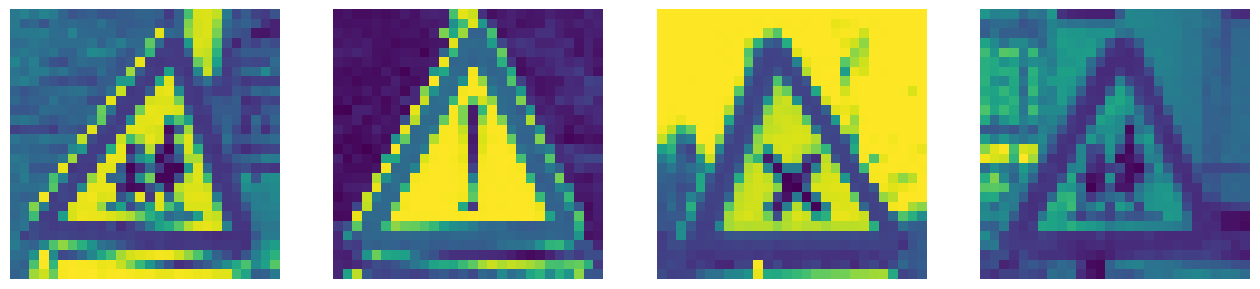

In [21]:
# show stop subfolder of hex
random_image(subfolder_variables['triangle']['warning'], sample_size=4)

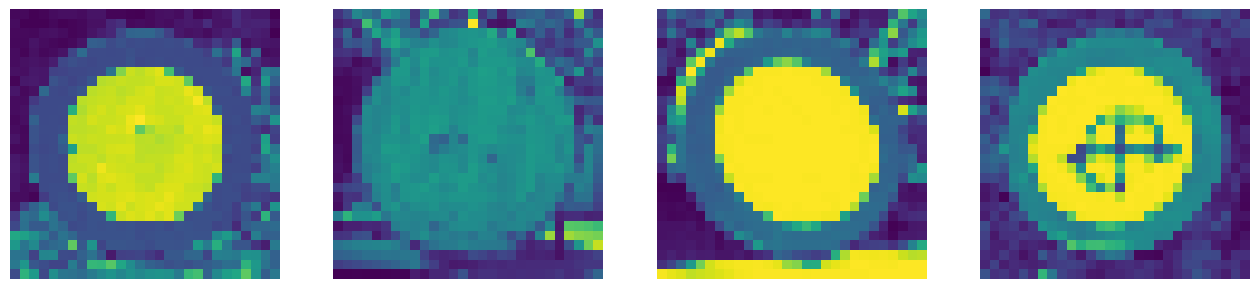

In [22]:
# show stop subfolder of hex
random_image(subfolder_variables['round']['limitedtraffic'], sample_size=4)

In [19]:
# double check shape of images
for i in range(len(df)):
    image_path = df.loc[i, 'image name']
    image = plt.imread(image_path)
    image_shape = image.shape
    print(f"Image at index {i}: Shape = {image_shape}")

Image at index 3178: Shape = (28, 28)
Image at index 3179: Shape = (28, 28)
Image at index 3180: Shape = (28, 28)
Image at index 3181: Shape = (28, 28)
Image at index 3182: Shape = (28, 28)
Image at index 3183: Shape = (28, 28)
Image at index 3184: Shape = (28, 28)
Image at index 3185: Shape = (28, 28)
Image at index 3186: Shape = (28, 28)
Image at index 3187: Shape = (28, 28)
Image at index 3188: Shape = (28, 28)
Image at index 3189: Shape = (28, 28)
Image at index 3190: Shape = (28, 28)
Image at index 3191: Shape = (28, 28)
Image at index 3192: Shape = (28, 28)
Image at index 3193: Shape = (28, 28)
Image at index 3194: Shape = (28, 28)
Image at index 3195: Shape = (28, 28)
Image at index 3196: Shape = (28, 28)
Image at index 3197: Shape = (28, 28)
Image at index 3198: Shape = (28, 28)
Image at index 3199: Shape = (28, 28)
Image at index 3200: Shape = (28, 28)
Image at index 3201: Shape = (28, 28)
Image at index 3202: Shape = (28, 28)
Image at index 3203: Shape = (28, 28)
Image at ind

# **Data Preprocessing**

## 1. Picture Rotation

In [ ]:
# def correct_image_orientation(image_path):
#     img = cv2.imread(image_path)
#     height, width = img.shape[:2]

#     if height > width:
#         rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
#         cv2.imwrite(image_path, rotated_img)

# def process_images_in_directory(root_dir):
#     for root, dirs, files in os.walk(root_dir):
#         for file in files:
#             if file.endswith('.png'):
#                 image_path = os.path.join(root, file)
#                 correct_image_orientation(image_path)



In [ ]:
# root_directory = 'drive/  __MACOSX/  sample_data/  trafficsigns_dataset/'
# process_images_in_directory(root_directory)

In [ ]:
# ls

## 2. Encode Labels

In [ ]:
df['label'].unique()

In [ ]:
df[df['encode_label'].isnull()]

## 3. Normalize?

# **Encode the images as arrays**

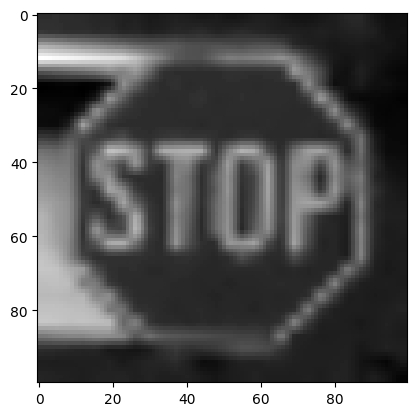

In [29]:
X  = []
for image_path in df['image name']:
    image = cv2.imread(str(image_path))
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    image_gray = cv2.resize(image_gray, (100, 100))  # Resize
    image_gray = image_gray / 255.0  # Normalize pixel values
    X .append(image_gray)

# Display the first grayscale image
plt.imshow(X [0], cmap='gray')
plt.show()


In [ ]:
len(X)
X[:2]

In [25]:
len(X)

3699

# **Splitting into train and test sets**

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into train set (70%), validation set (10%), and test set (20%)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=45)
train_data, val_data = train_test_split(train_data, test_size=0.125, random_state=45) # So there is more training data

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

# **Base model**

In [ ]:
from keras import layers
import keras

# Initialise
rotator_flipper = keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.4),
])

In [ ]:
model = tf.keras.Sequential([
    # Apply augmentation buy adding it to model layer
    rotator_flipper,
    tf.keras.layers.Flatten(input_shape=(28,28,3)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(16)
])
model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [ ]:
train_data['label'] = train_data['label'].astype('str')
val_data['label'] = val_data['label'].astype('str')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="image name",
        y_col="label",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="image name",
        y_col="label",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

In [ ]:
history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=50, verbose=0)

## Learning Curve

In [ ]:
import matplotlib.pyplot as plt
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

In [ ]:
plot_learning_curve(history.history['loss'], history.history['val_loss'],
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'],
                    metric_name='Accuracy')

# **Testing final model**

In [ ]:
test_data['label'] = test_data['label'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./',
        x_col="image name",
        y_col="label",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

In [ ]:
model.evaluate(test_generator)

# **Visualising predictions**

In [ ]:
sorted(df['label'].unique())

In [ ]:
sign_labels = {
    'diamond/rightofway':0,
 'hex/stop':1,
 'round/bicycle':2,
 'round/limitedtraffic':3,
 'round/noentry':4,
 'round/noparking':5,
 'round/roundabout':6,
 'round/speed':7,
 'round/trafficdirective':8,
 'round/traveldirection':9,
 'square/continue':10,
 'square/crossing':11,
 'square/laneend':12,
 'square/parking':13,
 'triangle/giveway':14,
 'triangle/warning':15
}

In [ ]:
import numpy as np

d_inv = {v: k for k, v in sign_labels.items()}
plt.figure(figsize=(30,3))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 4:
            plt.subplot(1,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))

        else:
            break

        plt.axis('off')

#CNN
Classify images according to sign-shape, such as diamond, hex, rectangle, round, triangle.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import regularizers

from tensorflow.keras import datasets, layers, models


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(0.001), input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

In [ ]:

# Define your train, validation, and test images and labels
train_images = np.array(train_data['image name'].tolist())
train_labels = np.array(train_data['label'].tolist())

val_images = np.array(val_data['image name'].tolist())
val_labels = np.array(val_data['label'].tolist())

test_images = np.array(test_data['image name'].tolist())
test_labels = np.array(test_data['label'].tolist())

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# # Fit the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(val_images, val_labels))